In [ ]:
#reference online notebook : https://www.learnpytorch.io/03_pytorch_computer_vision/

## 0. Computer vision libraries in PyTorch

* **torchvision** - base domain library for pytorch computer vision
* **torchvision.datasets** - get datasets and data loading functions for computer vision here.
* **torchvision.transforms** - functions for manipulating your vision data (images) to be suitable for use with an ML model
* **torch.utilis.data.Dataset** - Base dataset class for PyTorch
* **torch.utils.data.DataLoader** - Creates a Python iterable over a dataset.

In [ ]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


###1. Getting a Dataset
The Dataset we will be using is FashionMNIST from torchvision.daatsets

In [ ]:
#Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", #where to download data to?
    train=True, #do we want the training dataset?
    download=True, #do we want to download yes/no?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the dataset?
    target_transform=None #how do we want to transform the labels/target?
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None

)
#downloads train images, train labels, test images, test labels

100%|██████████| 26421880/26421880 [00:02<00:00, 11228954.91it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 206956.02it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3721078.99it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17859617.03it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
#See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
#Check the shape of our Image
print(f"Image shape: {image.shape} -> [Color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Image shape: torch.Size([1, 28, 28]) -> [Color_channels, height, width]
Image label: Ankle boot


### 1.2 Visualizing the data

Image shape: torch.Size([1, 28, 28])


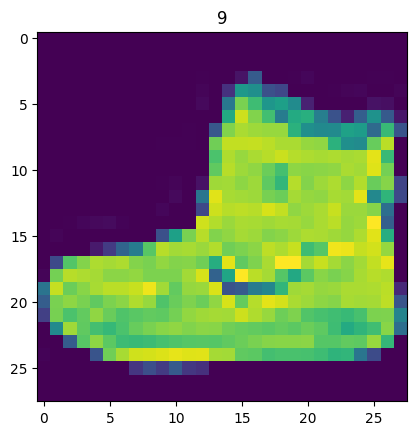

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}") #our data format [1, 28, 28]: colour channels first doesnt match the matplotlib data format expectation
plt.imshow(image.squeeze())
plt.title(label);
#image

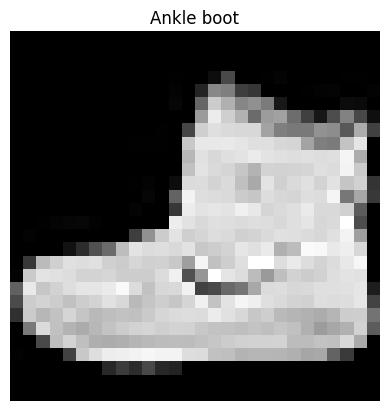

In [ ]:
#plot in grayscale

plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label]);
plt.axis(False);

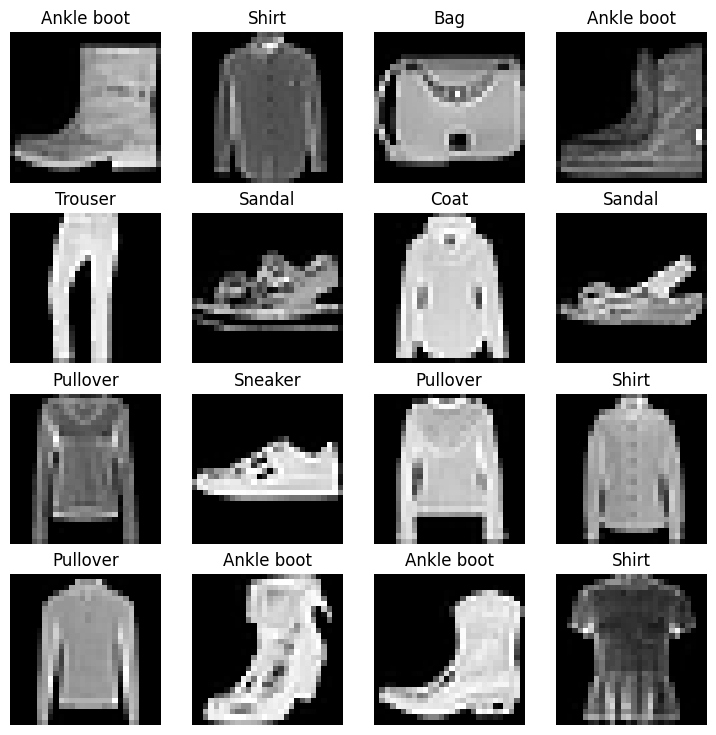

In [ ]:
# Plot more Images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols =4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);

In [ ]:
##Do you think these items of clothing (images) could be modelled with purelinear lines?? Or do you think we will need non linearities?

### 2. Prepare Dataloader

Right now, our data is in the form of PyTorch Datasets

Our Dataloader turns our pyTorch dataset into a Python Iterable. # object for iterating through its elements.

More specifically, we want to turn our data into batches ( or mini-batches).

Why would we do it?

#60,000 images is actually a small dataset in modern world.
#If i train 60,000 images, it will take up all memeory for 60,000.

#Group set of images to batches.

###why?

1. It is more computationally eficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time. (batch size is 32).
2. It gives our neural network more chances to update its gradients per epoch.
##This means, if we run 60,000 images at a time, per epoch, we would get only one update of gradients per epcoch. If we run 32 images per batch in an epoch,
# the weights will get updated for every batch (for every 32 images) in an epoch itself. By Optimizer.



In [ ]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [ ]:
from torch.utils.data import DataLoader

#setup the batch size hyperparameter
BATCH_SIZE = 32

#Turn datasets into iterable (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x783d4ed06590>,
 <torch.utils.data.dataloader.DataLoader at 0x783d4ed21a50>)

In [ ]:
# Let's check out what we've created
print(f"Dataloaders : {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders : (<torch.utils.data.dataloader.DataLoader object at 0x783d4ed06590>, <torch.utils.data.dataloader.DataLoader object at 0x783d4ed21a50>)
Length of train_dataloader: 1875 batches of 32
Length of test_dataloader: 313 batches of 32


In [ ]:
60000/32, 10000/32

(1875.0, 312.5)

In [ ]:
#Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


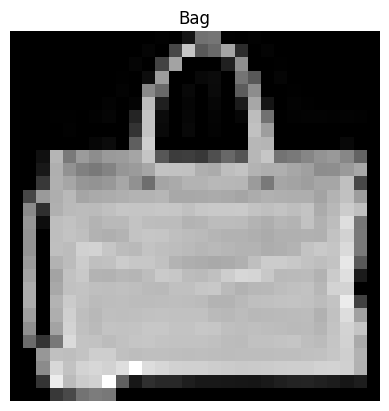

In [ ]:
#Show a sample (single image from a batch)
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline model

when starting to build a series of machine learning modeling experiments, it is best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

#get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x) #perform the forward pass

#Print out what happened
print(f"Shape before flattening : {x.shape} --> [color channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width] ")

Shape before flattening : torch.Size([1, 28, 28]) --> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width] 


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #feature vector #no learnable parameters
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

#setup instance of model with input parameters

model_0 = FashionMNISTModelV0(
    input_shape=784,# this is 28*28 # flatten
    hidden_units=10,
    output_shape=len(class_names)  #one for every class in FashionMNIST Dataset
).to("cpu")

model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
dummy_x = torch.rand([1, 1, 28, 28])  #batch one, color channel 1
model_0(dummy_x)  # pass X_train and X_test to the model to get predictions (batches of images) #can pass single image also.

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
model_0(dummy_x).shape  #prediction of probabilities of 10 classes

torch.Size([1, 10])

In [ ]:
#one of biggest errors in ML is different tensor shape mismatches.

In [ ]:
model_0.state_dict()   #layer 2 weight size : 1 x 10 # 1 output value and 10 previous hiddenunits.

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### 3.1 Setup loss, optimizer and evaluation metrics

* Loss function - since we are working with multi class data, our loss function will be 'nn.CrossEntropyLoss()' #categorical cross entropy function
* Optimizer - our optimizer 'torch.optim.SGD()' (STOCHASTIC gradient descent) #entry level optimizer
*Evaluation metric - since we are working on a classification problem, let's use accuracy as our evaluation metric

In [ ]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:  #save our file
    f.write(request.content)  #write content of helper functions to above file.

In [ ]:
#import accuracy function fom hlper funstions file
from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our modelling code

Machine learning is very experimental.

Two of the main things you will often want to track are:
1. Model's performance (loss and accuracy values etc)
2. How fast it runs


In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """"Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [ ]:
#example
start_time = timer()
# some code ..
end_time = timer()
print_train_time(start=start_time, end=end_time, device="cpu")

Train time on cpu: 0.000 seconds


5.393300000378076e-05

#### 3.3 Creating a training loop and training a model on batches of data

1. Loop through epochs
2. Loop through training batches, perform training steps, calculate the train loss **per batch**
3. Loop through testing batches, perform testing steps, calculate the test loss**per batch**
4. Print out what's happening
5. Time it all (for fun).

In [ ]:


# Import tqdm for progress bar
from tqdm.auto import tqdm

#Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ####Training
  train_loss = 0
  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):     #X, y is feature vector and label
    model_0.train()
    #1. Forward pass
    y_pred = model_0(X)

    #2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

    #Print out what's happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")  #len(X) = 32 samples, total batches : 1875, Example: batch * len(X): 45th batch * 32 images  = 1440 samples

  # Divide total train loss by length of the train dataloader
  train_loss /= len(train_dataloader)   # get avaerage of the train loss of batches per epoch

  ###Testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #1. Forward pass
      test_pred = model_0(X_test)

      #2. Calculate loss( accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      #3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))   #raw outputs are logits, logits to pred probs to pred labels. Comparing y_test labels to y_preds labels.

    #Calculate the test loss average per batch which gives test_loss per epoch
    test_loss /= len(test_dataloader)

    # Calculate the test acc average per epoch
    test_acc /= len(test_dataloader)

  #Print out what's happening
  print(f"\nTrain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}%")

#Calculate training time

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters())))


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387%
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969%
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Train loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265%
Train time on Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.

In [ ]:
str(next(model_0.parameters()).device)

'cpu'

### 4. Make predictions and get Model 0 results


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary conaining the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      #Make predictions
      y_pred = model(X)  #data and model are on different devices!!

      #Accumulate the loss and accuracy vales per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))   #argmax gets the index where the highest value of pred probabilities is. dim=n 1 dim=1,
                         #it typically indicates that the operation is being applied along the second dimension of a tensor.:
    #Scale loss and acc to find avaerage loss/acc per batch
    loss/= len(data_loader)  #avg loss for all samples 60,000.
    acc/= len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with a class}
          "model_loss": loss.item(),
          "model_acc": acc}

#Calculate model_0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
torch.cuda.is_available()

False

In [ ]:
## 5. Setup device agnostic-code (for using a GPU if there is one)
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Model 1: Building a better model with non linear functions

We learned about the power of non-linearity in notebook 02


In [ ]:
# Create a model with non linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),  #flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, #we can write as our image shape also 1 * 28 * 28
                              hidden_units=15,
                              output_shape=len(class_names)).to(device) #send to the gpu if it's available. #Shape : raw logits(preds) of 10 classes

next(model_1.parameters()).device

device(type='cpu')

#6.1 Setup loss, optimizer and evaluation metrics

In [ ]:
# import accuracy_fn from helper functions.py
from helper_functions import accuracy_fn

#setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), #tries to update our model'sparameters to reduce the loss
                            lr=0.1)


In [ ]:
device

'cpu'

### 6.2 Functionizing training and evaluation/testing loops

Lets create a function for:
* Training loop - 'train_step()'
* testing loop - 'test_step()'

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  """Performs a training with model trying to learn on data_loader.""" # check data_loader : it has taken dataset from where.
  train_loss, train_acc = 0, 0

  # Put model on training mode
  model.train()


  # Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(data_loader):     #X, y is feature vector and label
    #Put data on target device
    X, y = X.to(device), y.to(device)

    #1. Forward pass (outputs the raw logits from the model)
    y_pred = model(X)

    #2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1))  #go from logits --> prediction labels

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step()

  # Divide total train loss and acc by length of the train dataloader
  train_loss /= len(train_dataloader)   # get avaerage of the train loss of batches per epoch
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")



In [ ]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):  # setting defualt to target device
  """Performs a testing with model trying to **predict** on a data_loader"""

  test_loss, test_acc = 0, 0

  #Put model on eval mode
  model.eval()
  with torch.inference_mode():

    #Add a loop through all testing samples
    for X_test, y_test in data_loader:
      #Put data on target device
      X_test, y_test = X_test.to(device), y_test.to(device)

      #1. Forward pass
      test_pred = model(X_test)

      #2. Calculate the loss and accuracy(accumulatively)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    #Calculate the test_loss and test_acc average
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

    #Print out what's happening
    print(f"\nTest loss: {test_loss:.4f}, Test acc: {test_acc:.4f}%")


In [ ]:
torch.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#Set epochs
epochs = 10

#Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.80252 | Train acc: 69.48%

Test loss: 0.6459, Test acc: 78.0751%
Epoch: 1
------
Train loss: 0.48483 | Train acc: 82.51%

Test loss: 0.4838, Test acc: 82.4381%
Epoch: 2
------
Train loss: 0.43761 | Train acc: 84.31%

Test loss: 0.4598, Test acc: 83.3666%
Epoch: 3
------
Train loss: 0.41562 | Train acc: 84.95%

Test loss: 0.4483, Test acc: 84.2951%
Epoch: 4
------
Train loss: 0.39996 | Train acc: 85.48%

Test loss: 0.4500, Test acc: 83.7859%
Epoch: 5
------
Train loss: 0.38749 | Train acc: 86.00%

Test loss: 0.4368, Test acc: 84.3850%
Epoch: 6
------
Train loss: 0.37882 | Train acc: 86.16%

Test loss: 0.4284, Test acc: 84.9042%
Epoch: 7
------
Train loss: 0.37143 | Train acc: 86.47%

Test loss: 0.4116, Test acc: 85.4034%
Epoch: 8
------
Train loss: 0.36537 | Train acc: 86.71%

Test loss: 0.4266, Test acc: 84.9441%
Epoch: 9
------
Train loss: 0.35943 | Train acc: 86.95%

Test loss: 0.4045, Test acc: 85.7528%
Train time on cpu: 143.973 seconds


In [ ]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary conaining the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      #Make predictions
      y_pred = model(X)  #data and model are on different devices!!

      #Accumulate the loss and accuracy vales per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))   #argmax gets the index where the highest value of pred probabilities is.
    #Scale loss and acc to find avaerage loss/acc per batch
    loss/= len(data_loader)  #avg loss for all samples 60,000.
    acc/= len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with a class}
          "model_loss": loss.item(),
          "model_acc": acc}

#Calculate model_0 results on test dataset
#model_1

In [ ]:
# Get model_1 results dictionary
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.40451136231422424,
 'model_acc': 85.75279552715655}

In [ ]:
# Get model_1 results dictionary
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## Model 2: Building a Convolutional Neural Network

CNN's are also known ConvNets

CNN's are known for their capabilities to find patterns in visual data.

In [ ]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG model
  from CNN explainer website.
  """
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1), #values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=(2))
    )
    self.classifier = nn.Sequential(   #classifier is another name for fully connected layers (linear layers with non linear activation functions)
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,    #there is a trick to calculate this
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x


In [ ]:
torch.manual_seed(42)

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"


print(device)

model_2 = FashionMNISTModelV2(input_shape=1,    #input shape is num of channels in our images. that is 1
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

model_2

cpu


FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

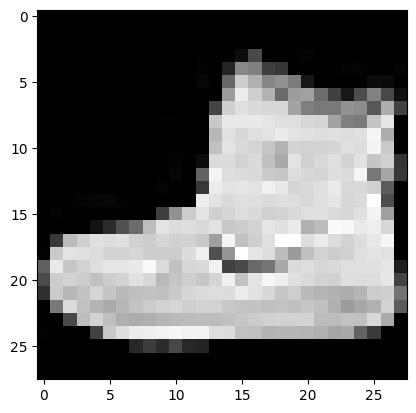

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')


In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28)).to(device)
rand_image_tensor.shape   #in the previous versions of pytorch, conv2d expects a 4- dm imput of [Batch size, C, H, W]

torch.Size([1, 28, 28])

In [ ]:
model_2(rand_image_tensor.unsqueeze(0)).to(device)

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

In [ ]:
image.shape

torch.Size([1, 28, 28])

### 7.1 Stepping through 'nn.Conv2d'

See the documentation for nn.Conv2d

In [ ]:
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:

torch.manual_seed(42)
# Create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3, 3),
                       stride=1,
                       padding=0)

# Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 62, 62])

In [ ]:
#[1, 10, 62, 62] : [batchsize, channels, h, w] 1 image per batch.  [N, C, H, W]

### 7.2 Stepping through **nn.MaxPool2d()**   #max pool gives half dimenion depending on kernel size and stride

In [ ]:
test_image.shape

torch.Size([3, 64, 64])

In [ ]:
# Print out original image shape without unsqueezed dim
print(f"Test image original shape:\n {test_image.shape}")
print(f"Test image with unsqueezed dimension:\n {test_image.unsqueeze(0).shape}")

# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# Pass data through just the conv layer
test_image_through_conv = conv_layer(test_image)
print(f"Shape after going through conv_layer():\n {test_image_through_conv.shape}")

#Pass data through the max pool layer
test_image_through_conv_and_maxpool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer():\n {test_image_through_conv_and_maxpool.shape}")

Test image original shape:
 torch.Size([3, 64, 64])
Test image with unsqueezed dimension:
 torch.Size([1, 3, 64, 64])
Shape after going through conv_layer():
 torch.Size([10, 62, 62])
Shape after going through conv_layer() and max_pool_layer():
 torch.Size([10, 31, 31])


In [ ]:
torch.manual_seed(42)
#Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))   #(batch_size, color_channels, width, height)

print(f" random tensor:\n {random_tensor} ")
print(f" random tensor shape:\n {random_tensor.shape} ")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#Pass the random tensor through the MAX POOL LAYER
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

 random tensor:
 tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]]) 
 random tensor shape:
 torch.Size([1, 1, 2, 2]) 

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


In [ ]:
# CNN Model : Input layer -> Conv2d layer -> ReLU Activation layer ->Max Pooling layer -> Output layer

###7.3 Setup a loss function and optimizer


In [ ]:
#Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

###7.4 Training and testing model_2 using our training and test functions

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

#Train and test model
epochs = 10
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)
  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
------
Train loss: 0.59518 | Train acc: 78.38%

Test loss: 0.3950, Test acc: 85.9924%
Epoch: 1
------
Train loss: 0.36536 | Train acc: 86.90%

Test loss: 0.3524, Test acc: 86.9109%
Epoch: 2
------
Train loss: 0.32588 | Train acc: 88.13%

Test loss: 0.3272, Test acc: 88.0691%
Epoch: 3
------
Train loss: 0.30489 | Train acc: 88.92%

Test loss: 0.3231, Test acc: 88.2488%
Epoch: 4
------
Train loss: 0.28981 | Train acc: 89.56%

Test loss: 0.3084, Test acc: 88.9077%
Epoch: 5
------
Train loss: 0.27944 | Train acc: 89.82%

Test loss: 0.2999, Test acc: 89.3670%
Epoch: 6
------
Train loss: 0.27027 | Train acc: 90.09%

Test loss: 0.3103, Test acc: 88.7979%
Epoch: 7
------
Train loss: 0.26670 | Train acc: 90.22%

Test loss: 0.3022, Test acc: 88.9477%
Epoch: 8
------
Train loss: 0.25909 | Train acc: 90.55%

Test loss: 0.2915, Test acc: 89.5966%
Epoch: 9
------
Train loss: 0.25397 | Train acc: 90.71%

Test loss: 0.3142, Test acc: 89.3071%
Train time on cpu: 595.949 seconds


In [ ]:
#Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31420570611953735,
 'model_acc': 89.30710862619809}

In [ ]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

##8. Comparing the model results and training time


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                               model_1_results,
                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.404511,85.752796
2,FashionMNISTModelV2,0.314206,89.307109


In [ ]:
# Add training time to results comparision
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,55.865689
1,FashionMNISTModelV1,0.404511,85.752796,143.973344
2,FashionMNISTModelV2,0.314206,89.307109,595.949202


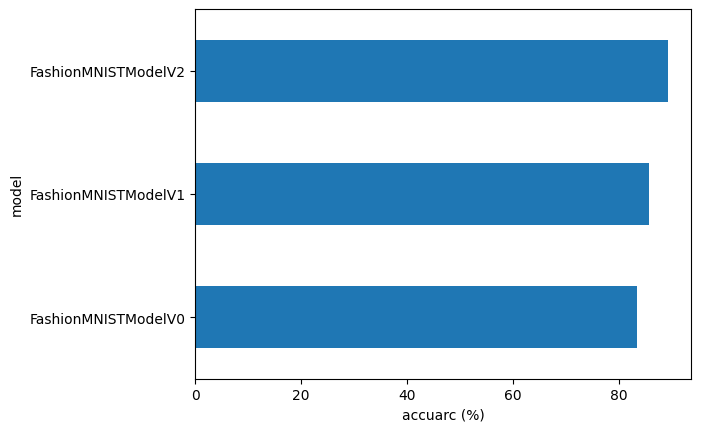

In [ ]:
# Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")  #barh: horizontal bar chat
plt.xlabel("accuarc (%)")
plt.ylabel("model");

### 9. Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):

  pred_probs = []   #we get a list of pred_probs with all samples (image tensors) predicted on it.
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # Prepare the sample (add a batch dimension: unsqueeze and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)  #data and model should be on same device

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      #Get prediction probability (logit --> pred probs )
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # turn pred probs to pred labels

      #Get pred_prob off the GPU for further calculations
      pred_probs.append(pred_prob.cpu())

  # Stack the pred_probs to turn list into a tensor
  return torch.stack(pred_probs)

In [ ]:
test_data

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
import random
torch.manual_seed(42)
test_samples = []
test_labels = []  #when the model makes preidctions, we can compare them to labels
for sample, label in random.sample(list(test_data), k=9):  #get some random samples from test_dataset  #9 random samples, 9 labels
  test_samples.append(sample)
  test_labels.append(label)

#View the first sample shape
test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
len(test_samples), len(test_labels)

(9, 9)

Text(0.5, 1.0, 'Shirt')

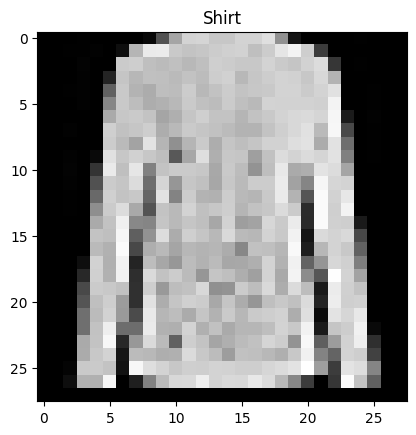

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [ ]:
## Make predictions  #randomly pic 9 samples from test_data and predict on them with make_predictiosn functions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

#View first two predictions probabilities
pred_probs[:2]

tensor([[2.3900e-03, 8.5152e-07, 7.5617e-01, 3.7456e-04, 1.0954e-03, 8.1429e-06,
         2.3995e-01, 3.1294e-09, 1.9995e-06, 2.6339e-07],
        [1.2026e-04, 1.2730e-05, 6.3479e-06, 9.9984e-01, 4.5249e-06, 7.4670e-08,
         3.6565e-06, 2.8756e-06, 1.0717e-07, 1.1708e-05]])

In [ ]:
# Convert prediction probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 3, 9, 6, 4, 1, 1, 1, 0])

In [ ]:
test_labels

[6, 3, 9, 6, 4, 1, 1, 1, 0]

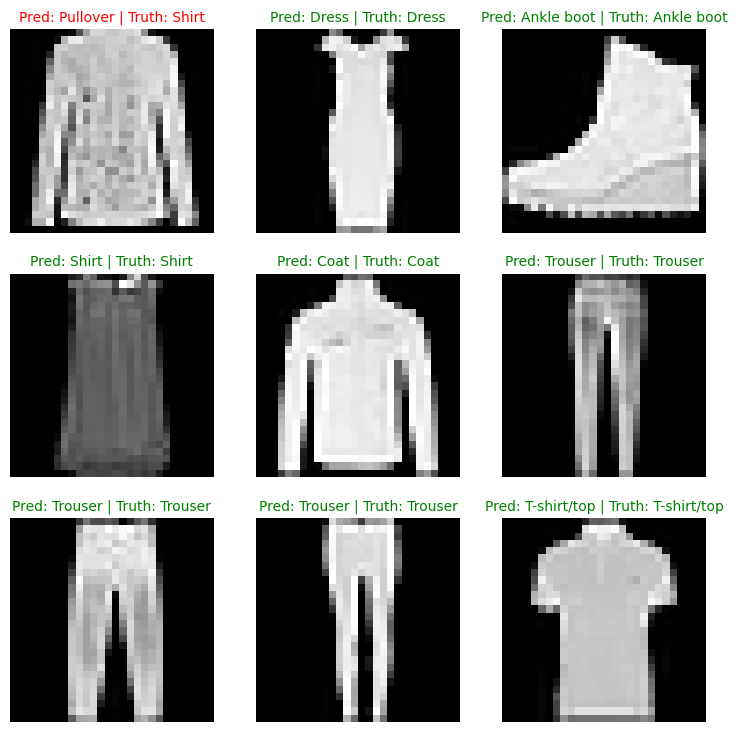

In [ ]:
# Plot predictions : plot 9 diferent samples along with their original labels

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create subplot
  plt.subplot(nrows, ncols, i+1)

  #PLot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  #Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  #Create a title for the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  #Check for equality bbetween pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")  #green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False);


### 10. Making a confusion matrix for further prediction evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually.

1. Make predictions with our trained model on the test dataset
2. Make a confusion matrix **torchmetrics.ConfusionMatrix**
3. Plot the confusion matrix using **mlxtend.plotting.plot_confusion_matrix()**

In [ ]:
# Import tqdm.auto
from tqdm.auto import tqdm

#1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions...."):
    #Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    #Do the forward pass
    y_logit = model_2(X)
    #Turn prediction from logits --> pred probs to ---> pred labels
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    #Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())

  # Concatenate list of predictions into a tensor
  # print(y_preds)
  y_pred_tensor = torch.cat(y_preds)
  y_pred_tensor[:10]

Making predictions....:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
y_pred_tensor[:10]

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
len(y_pred_tensor)

10000

In [ ]:
y_pred_tensor.shape

torch.Size([10000])

In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

'0.22.0'

In [ ]:
import torchmetrics

In [ ]:
# See if required packages are installed and if not, install them....
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1])>= 19, "mlxtend version should be 0.19 or higher"
except:
  !pip install -q trochmetrics
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

ERROR: Could not find a version that satisfies the requirement trochmetrics (from versions: none)
ERROR: No matching distribution found for trochmetrics


ModuleNotFoundError: No module named 'torchmetrics'

In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19 or higher"

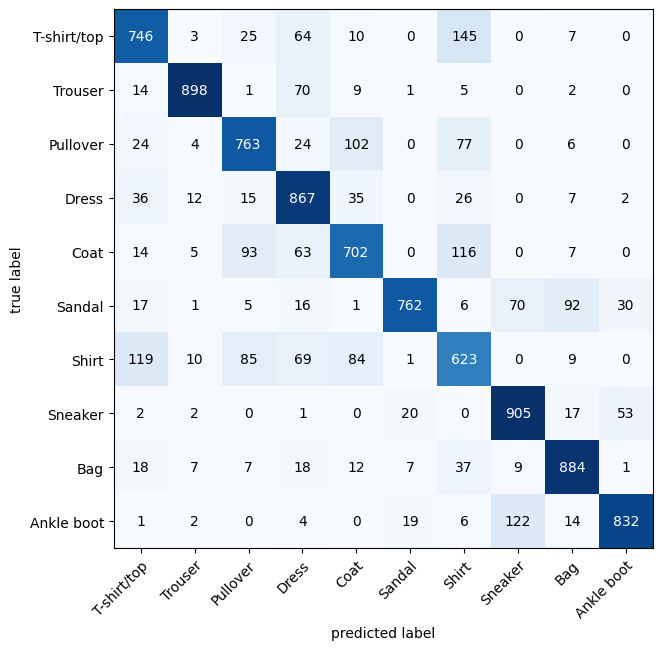

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2. Sertup confusion instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor =confmat(preds=y_pred_tensor,
                        target=test_data.targets)

#3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),  # matplotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

In [ ]:
confmat_tensor

tensor([[746,   3,  25,  64,  10,   0, 145,   0,   7,   0],
        [ 14, 898,   1,  70,   9,   1,   5,   0,   2,   0],
        [ 24,   4, 763,  24, 102,   0,  77,   0,   6,   0],
        [ 36,  12,  15, 867,  35,   0,  26,   0,   7,   2],
        [ 14,   5,  93,  63, 702,   0, 116,   0,   7,   0],
        [ 17,   1,   5,  16,   1, 762,   6,  70,  92,  30],
        [119,  10,  85,  69,  84,   1, 623,   0,   9,   0],
        [  2,   2,   0,   1,   0,  20,   0, 905,  17,  53],
        [ 18,   7,   7,  18,  12,   7,  37,   9, 884,   1],
        [  1,   2,   0,   4,   0,  19,   6, 122,  14, 832]])

### 11. Save and load best performing model

In [ ]:
from pathlib import Path

#Create model dictory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# Create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.path"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME


#Save the model state dict

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.path


In [ ]:
##Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMNISTModelV2(input_shape=1,   #num of channels: grayscale
                                     hidden_units=10,
                                     output_shape=len(class_names))

#Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))   #load the saved state dict(saved weights to the new model(mew instance of the model config: FashionMNIST))
#giving a variable to models/03_pytorch_computer_vision_model_2.pth i.e., MODEL_SAVE_PATH

# Send the model to the target device
loaded_model_2.to(device)

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
#previous model results
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31420570611953735,
 'model_acc': 89.30710862619809}

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.31420570611953735,
 'model_acc': 89.30710862619809}

In [ ]:
# Check if model results are close to each other
torch.isclose(torch.tensor(model_2_results["model_loss"]),
                           torch.tensor(loaded_model_2_results["model_loss"]))   #model_loss is just a value not tensor, to compare using torch, we need tpo convert to torch tensor

tensor(True)

####**Exercises**

https://www.learnpytorch.io/03_pytorch_computer_vision/#exercises

**Question1**

What are the three areas in industry where computer vision is currently being used?
1. Self-driving cars
2. Pedestrian detection
3. Parking occupancy detection
4. X-Ray analysis
5. Cancer detection

**Question2**

What is overfitting?

**Ans** : In machine learning, overfitting occurs when an algorithm fits too closely or even exactly to its training data, resulting in a model that can’t make accurate predictions or conclusions on unseen data(test data)

High variance, also known as overfitting, means the model focuses too much on specific patterns in the training dataset and does not generalize well on unseen data. Overfitting can happen when models are too complex.

Overfitting defeats purpose of the machine learning model. Generalization of a model to new data is ultimately what allows us to use machine learning algorithms every day to make predictions and classify data.

When the model trains for too long on sample data or when the model is too complex, it can start to learn the “noise,” or irrelevant information, within the dataset. When the model memorizes the noise and fits too closely to the training set, the model becomes “overfitted,” and it is unable to generalize well to new data.


**Question3**

Ways to prevent overfitting in machine lerarning:


1. Regularization
2. Train with more data
3. Cross validation
3. Dropout regularization
4. Data augmentation
5. Early stopping

1. **Reularization** introduces a penalty term to the model's objective function, discouraging overly complex models that might fit the training data too closely.

Regularization techniques help control the complexity of the model, making it more robust and improving its ability to generalize to unseen data. The choice of regularization technique and the strength of the regularization parameter are important hyperparameters that need to be tuned during model training.

2. **Dropout Regularization** (for Neural Networks): Randomly drops units (along with their connections) from the neural network during training. This helps prevent overfitting by forcing the network to learn redundant representations of the data.

3. **Cross-validation** is a resampling technique used in machine learning to assess the performance of a predictive model. Its primary goal is to evaluate a model's ability to generalize to unseen data.

Here's how cross-validation works:

Data Splitting: The available dataset is divided into several subsets or folds. Typically, the data is divided into k subsets of approximately equal size.

Training and Validation: The model is trained on k-1 folds (training data) and validated on the remaining fold (validation data). This process is repeated k times, each time using a different fold as the validation set and the remaining folds as the training set.

Performance Evaluation: After each iteration of training and validation, the performance metric (such as accuracy, mean squared error, etc.) is calculated on the validation set.

Average Performance: Finally, the performance metrics obtained from each fold are averaged to obtain an overall performance estimate of the model. This average performance is often considered a more reliable estimate than the performance on a single validation set.

Remaining exercises another Notebook